In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [10]:
# Load the advertising dataset
data = pd.read_csv('advertising.csv')

In [24]:
# Data Exploration
print(data.head())
print(data.info())
print(data.describe())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000

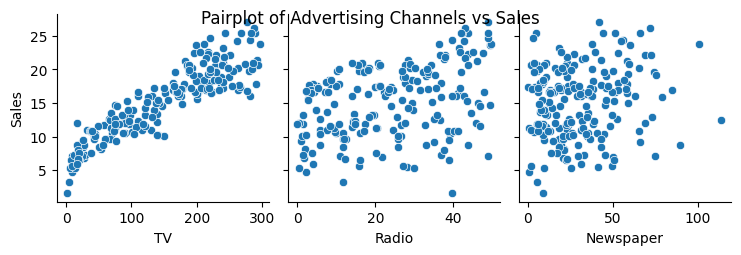

In [12]:
# Data Visualization
sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', kind='scatter')
plt.suptitle('Pairplot of Advertising Channels vs Sales')
plt.show()

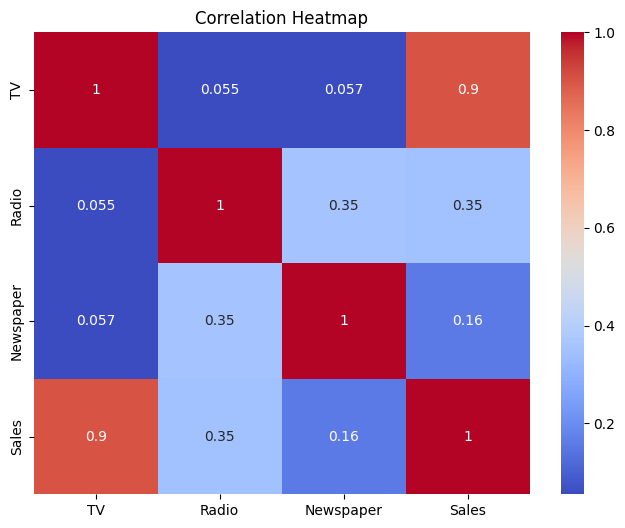

In [13]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [15]:
# Data Preprocessing
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Linear Regression Mean Squared Error: {mse}')

Linear Regression Mean Squared Error: 2.9077569102710896


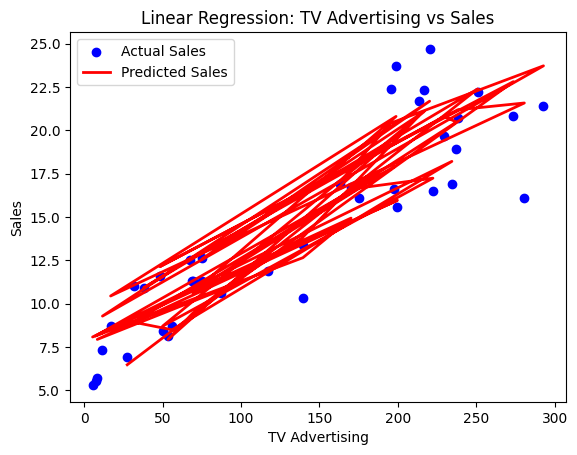

In [17]:
# Visualize Linear Regression Line
plt.scatter(X_test['TV'], y_test, color='blue', label='Actual Sales')
plt.plot(X_test['TV'], y_pred, color='red', linewidth=2, label='Predicted Sales')
plt.xlabel('TV Advertising')
plt.ylabel('Sales')
plt.title('Linear Regression: TV Advertising vs Sales')
plt.legend()
plt.show()

In [18]:
# Making Multiple Predictions
new_data_multiple = pd.DataFrame({'TV': [100, 150, 200], 'Radio': [20, 30, 40], 'Newspaper': [10, 15, 25]})
predicted_sales_multiple = model.predict(new_data_multiple)
for i, prediction in enumerate(predicted_sales_multiple):
    print(f'Predicted Sales for TV Advertising ${new_data_multiple.iloc[i]["TV"]}: {prediction}')

Predicted Sales for TV Advertising $100: 12.227327202015562
Predicted Sales for TV Advertising $150: 15.983927601916278
Predicted Sales for TV Advertising $200: 19.762211235927168


In [19]:
# Advertising Expenditure Analysis
total_expenditure = data[['TV', 'Radio', 'Newspaper']].sum()
print(f'Total Advertising Expenditure:\n{total_expenditure}')

Total Advertising Expenditure:
TV           29408.5
Radio         4652.8
Newspaper     6110.8
dtype: float64


In [20]:
# Feature Importance
feature_importances = model.coef_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(f'Feature Importances:\n{feature_importance_df}')

Feature Importances:
     Feature  Importance
1      Radio    0.100945
0         TV    0.054509
2  Newspaper    0.004337


In [21]:
# Optimizing Advertising Strategies
best_advertising_channel = feature_importance_df.iloc[0]['Feature']
print(f'Best Advertising Channel: {best_advertising_channel}')

Best Advertising Channel: Radio


In [22]:
# Maximizing Sales Potential with Different Budgets
budgets = [10000, 20000, 30000]
for budget in budgets:
    new_data_optimized = pd.DataFrame({'TV': [budget], 'Radio': [0], 'Newspaper': [0]})
    predicted_sales_optimized = model.predict(new_data_optimized)
    print(f'Predicted Sales with ${budget} Budget: {predicted_sales_optimized[0]}')

Predicted Sales with $10000 Budget: 549.8068347744119
Predicted Sales with $20000 Budget: 1094.8995431466096
Predicted Sales with $30000 Budget: 1639.9922515188075
